## 0.0 Importing Necassary libraries


In [562]:

#importing necessary libraries\
import warnings
warnings.filterwarnings('ignore')

#darta analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Preparation, Modeling, and Evaluation (SKLearn Modules)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#dimensionality reduction
from sklearn.decomposition import PCA

#Machine Learnning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
# Machine Learning Model Evaluation Methods 
#
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV




## 1.0 Loading data 

In [563]:

#loading the dataset
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')


In [ ]:

#checking the first 5 rows of the dataset
train.head(20)

In [ ]:
train.tail(20)

## 1.1 lets view our columns info

In [ ]:

# Select the first 20 columns and print the first 20 rows
print(train.iloc[:, :20].head(30))



In [ ]:

train.tail(30)

In [ ]:

# Select the next 20 columns and print the first 20 rows
print(train.iloc[:, 20:40].head(20))


In [ ]:
# Select the next 20 columns after the first 40 columns and print the first 20 rows
print(train.iloc[:, 40:60].head(20))



In [ ]:

# Select the next 20 columns after the first 40 columns and print the first 20 rows
print(train.iloc[:, 60:80].head(20))


In [ ]:

columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Street', 'LandContour', 'Utilities', 
                   'LandSlope', 'RoofMatl', 'Heating', 'CentralAir', 'LowQualFinSF', 'GarageCond', 
                   'PavedDrive', 'PoolArea']

# Drop the specified columns
train = train.drop(columns=columns_to_drop)

# Display the resulting DataFrame
print(train.head())


In [ ]:

#print all nan columns
nan_columns = train.columns[train.isna().any()].tolist()
print("Columns containing NaN values:")
print(nan_columns)


In [500]:

#test.head()


In [ ]:
train.info()

In [502]:
#test.info()


In [ ]:

train.describe()


## Insights from quick data analysis

we have 1460 rows and 81 columns

Some columns contain Nan Values all through in their rows.

some columns have little or no information necessaryfor our PCA 
since their rows information is uniform all through 

we have 36 numerical columns in our train volume

High probability the data is skewed to the right.this is because 75% percentile is above mean in most columns



In [504]:

#test.describe()


## 2.0 Exploratory Data Analysis

##
KDE  offers Smooth Estimation of the probability density function,
which can be helpful for visualizing the distribution of data
especially when the underlying distribution is unknown or complex like our data here.

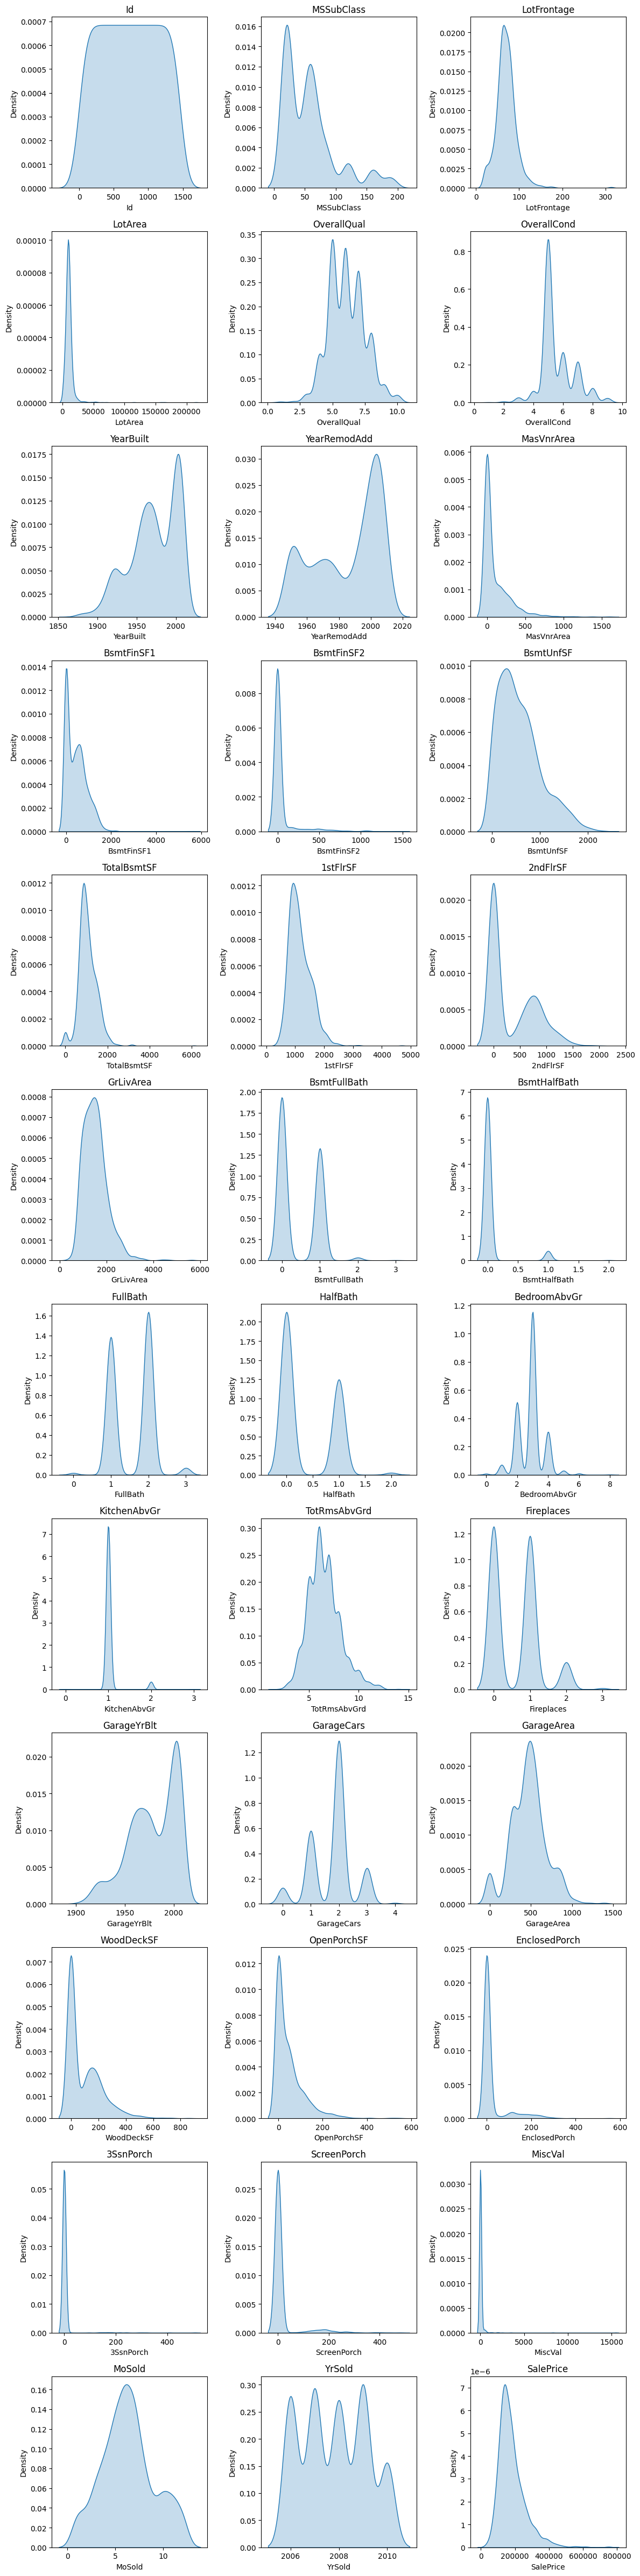

In [575]:

# Limit the number of columns per row
columns_per_row = 3

# Calculate the number of rows needed
num_rows = (len(numerical_columns) - 1) // columns_per_row + 1

# Create a figure and axis object
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(4 * columns_per_row, 4 * num_rows))

# Loop through each numerical column
for i, column in enumerate(numerical_columns):
    # Calculate the position (row, column) of the current subplot
    row = i // columns_per_row
    col = i % columns_per_row
    
    # Plot KDE plot for the current column
    sns.kdeplot(train[column], fill=True, ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


## Iisights from Eda

Most houseswere built and modified in 21st century.

Most garages we built in 2000s and average car ownership stands at 2 cars.

most houses are sold at $300000

## 3.0 PREPROCESSING.




## Adddressing Missing data

In [505]:

#checking for missing values
#print only the columns with missing values
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
dtype: int64

In [506]:

#checking for missing values

print('missing values in train dataset:',train.isnull().sum().sum())

missing values in train dataset: 2341


In [507]:

#checking for missing values
#test.isnull().sum()[train.isnull().sum()>0]

In [508]:
#printing the total missing values in the test dataset
#print('missing values in test dataset:',test.isnull().sum().sum())

## insights 101

we have a lot of missing data in both datasets

we have 81 and 80 columns respectively

In [ ]:
train.columns

In [510]:
train['SalePrice'].median()


163000.0

In [511]:

#highest sale price
train['SalePrice'].max()

755000

In [512]:

#lowest sale price
train['SalePrice'].min()

34900

In [513]:

#above the mean sale price total

print(train[train['SalePrice']>train['SalePrice'].mean()].shape[0])




560


In [514]:
#number of rows in the dataset
train.shape[0]

1460

In [515]:
#mode  of the train dataset for the target variable
train['SalePrice'].mode()




0    140000
Name: SalePrice, dtype: int64

In [ ]:
# Select only categorical columns
categorical_columns = train.select_dtypes(include='object')

# Check for missing values in categorical columns
missing_values = categorical_columns.isnull().sum()

# Filter categorical columns with missing values
missing_values= missing_values[missing_values > 0]

# Print categorical columns with missing values
print("Categorical columns with missing values:")
print(missing_values)



In [520]:

#import pandas as pd

# Assuming train is your DataFrame
# Select only numerical columns
numerical_columns = train.select_dtypes(include='number')

# Check for missing values in numerical columns
missing_values = numerical_columns.isnull().sum()
missing_values= missing_values[missing_values > 0]
# Print missing values count for each numerical column
print(missing_values)


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [578]:

# Define the columns with missing values
#columns_with_missing_numeric = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Fill missing values with mean for each column
#for column in columns_with_missing_numeric:
    #mean_value = train[column].mean()  # Get the mean value
    #train[column].fillna(mean_value, inplace=True)  # Fill missing values with mean

# Display the DataFrame with missing values filled
#print(train[columns_with_missing_numeric].isnull().sum())  # Check if there are any remaining missing values


In [418]:
# Select only numerical columns
#numerical_columns = train.select_dtypes(include='number')

# Check for missing values in numerical columns
#missing_values = numerical_columns.isnull().sum()

# Filter numerical columns with missing values
#train = missing_values[missing_values > 0]

# Print numerical columns with missing values
#print("Numerical columns with missing values:")
#print(train)



In [523]:

train.shape[0]


1460

## 3.2 Preprocessing Steps:

For numerical data:

Imputation of missing values using the mean strategy (SimpleImputer).

Scaling of features using standardization (StandardScaler).

For categorical data:

Imputation of missing values using the most frequent strategy (SimpleImputer).

One-hot encoding of categorical features (OneHotEncoder).

In [527]:


# Separate numerical and categorical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Define preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocess the data
train = preprocessor.fit_transform(train)



## 4.0  PCA MODELLING


## 4.1
The PCA step (pca) is also included in the pipeline. This step reduces the dimensionality of the data.

In [535]:


# Convert the NumPy array 'train' to a pandas DataFrame
train = pd.DataFrame(train, columns=categorical_columns.tolist() + numerical_columns.tolist())

# Define the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps defined earlier
    ('pca', pca)  # PCA step
])

# Fit the pipeline to the data
train_pca = pipeline.fit_transform(train)



## 4.2 
This visualization helps in understanding how many principal components are needed to explain most of the variance in the data.

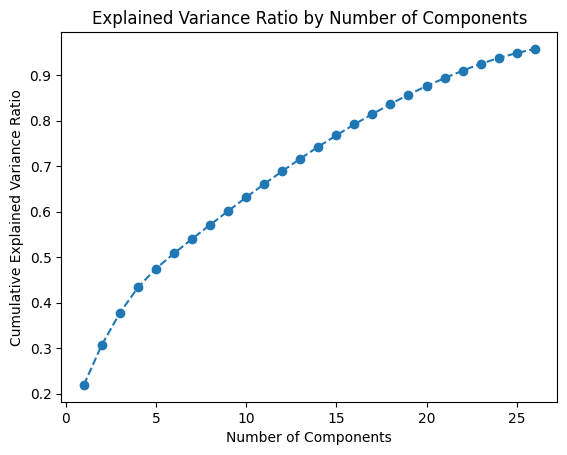

In [536]:

# Access the explained variance ratio
explained_variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_

# Visualize the explained variance ratio
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()


## conclusion 

25 components explain 95% of our data

In [537]:

# Initialize PCA with 25 components
pca = PCA(n_components=25)

# Define the pipeline with PCA
#pipeline = Pipeline(steps=[
    #('preprocessor', preprocessor),  # Preprocessing steps defined earlier
    #('pca', pca)  # PCA step
#])

# Fit the pipeline to the data
train_pca = pipeline.fit_transform(train)


##

This above initializes PCA with 25 components.


## 5.0 MODEL SELECTION

## 5.1 

This process allows comparing the performance of different regression models.

In [544]:

target_variable= train['SalePrice']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_pca, target_variable, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error:", mse)


Linear Regression Mean Squared Error: 0.144304167689012
Random Forest Mean Squared Error: 0.13222366507894096
Gradient Boosting Mean Squared Error: 0.11600411125148707
Decision Tree Mean Squared Error: 0.15630276294911363



## MSE

The Gradient Boosting model has the lowest MSE, indicating better performance in predicting the target variable compared to the other models.

In [559]:

from sklearn.metrics import mean_squared_error

# Dictionary to store RMSE for each model
rmse_results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE from MSE
    rmse_results[name] = rmse
    print(f"{name} RMSE:", rmse)

# Print RMSE for each model
print("RMSE results:", rmse_results)


Linear Regression RMSE: 0.37987388392598403
Random Forest RMSE: 0.36362572114598957
Gradient Boosting RMSE: 0.34059376279005327
Decision Tree RMSE: 0.3953514423258294
RMSE results: {'Linear Regression': 0.37987388392598403, 'Random Forest': 0.36362572114598957, 'Gradient Boosting': 0.34059376279005327, 'Decision Tree': 0.3953514423258294}



## RMSE

Additionally, the RMSE results dictionary confirms these values. Among these models, Gradient Boosting has the lowest RMSE, indicating better performance in predicting the target variable compared to the other models.

In [547]:

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # Calculate adjusted R-squared
    #print(f"{name} Mean Squared Error:", mse)
    print(f"{name} Adjusted R-squared:", adjusted_r2)


Linear Regression Adjusted R-squared: 0.8701970193251325
Random Forest Adjusted R-squared: 0.8810635471042685
Gradient Boosting Adjusted R-squared: 0.8956531910884752
Decision Tree Adjusted R-squared: 0.8594041679916286



## Adjusted R2

These Adjusted R-squared values measure the proportion of variance explained by each model, adjusted for the number of predictors. Among these models, Gradient Boosting has the highest Adjusted R-squared, indicating that it explains the most variance in the target variable and performs better in capturing the underlying patterns.

## 6.0 MODEL TUNING

## 6.1 Tuning for Random Forest Regressor

Performing hyperparameter tuning using GridSearchCV for a Random Forest Regressor model. 

RF was our second best perfoming regressor.

This approach helps in finding the optimal hyperparameters for the Random Forest model that minimize the mean squared error on the training data.

Below wee best parameters after several trials

In [551]:
# Define the scoring function using mean squared error
scorer = make_scorer(mean_squared_error)

# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [500, 700, 800],
    'max_depth': [20, 25, 30],
    'min_samples_split': [20, 15, 10]
}

# Create GridSearchCV object for Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring=scorer,  # Use the custom scorer
                           cv=5,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", grid_search.best_score_)



Best Parameters: {'max_depth': 25, 'min_samples_split': 20, 'n_estimators': 800}
Best Score (MSE): 0.12819646447452554


In [553]:


# Define a function to calculate adjusted R-squared
def adjusted_r2(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((len(y_true) - 1) / (len(y_true) - n_features - 1))
    return adjusted_r2

# Make a scorer from the adjusted_r2 function
scorer = make_scorer(adjusted_r2, greater_is_better=True, n_features=X_train.shape[1])

# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [500, 700, 800],
    'max_depth': [20, 25, 30],
    'min_samples_split': [20, 15, 10]
}

# Create GridSearchCV object for Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring=scorer,  # Use the custom scorer
                           cv=5,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Adjusted R-squared:", grid_search.best_score_)
print("Best Adjusted R-squared (on test data):", adjusted_r2(y_test, grid_search.predict(X_test), X_test.shape[1])) 



Best Parameters: {'max_depth': 25, 'min_samples_split': 10, 'n_estimators': 500}
Best Adjusted R-squared: 0.8545013777323145
Best Adjusted R-squared (on test data): 0.8912189566869547


## Tuning for Gradient Boosting.

our best model

In [558]:

from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define mean squared error (MSE) scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create GridSearchCV object for Gradient Boosting with MSE scorer
grid_search_rmse = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                                param_grid=param_grid,
                                scoring=scorer,
                                cv=5,
                                n_jobs=-1)

# Fit the grid search to the data
grid_search_rmse.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search_rmse.best_params_)
best_rmse = np.sqrt(-grid_search_rmse.best_score_)  # Take the square root of the negative of the best score
print("Best RMSE:", best_rmse)
print("Best RMSE (on test data):", np.sqrt(mean_squared_error(y_test, grid_search_rmse.predict(X_test))))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best RMSE: 0.34011093332589043
Best RMSE (on test data): 0.3362456439211166


In [556]:

from sklearn.ensemble import GradientBoostingRegressor

# Define hyperparameters grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid,
                              scoring=scorer,  # Use the custom scorer
                              cv=5,
                              n_jobs=-1)

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search_gb.best_params_)
print("Best Adjusted R-squared:", grid_search_gb.best_score_)
print("Best Adjusted R-squared (on test data):", adjusted_r2(y_test, grid_search_gb.predict(X_test), X_test.shape[1]))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Adjusted R-squared: -0.1947853683594972
Best Adjusted R-squared (on test data): 0.898300428156972
